In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [2]:
batch_size = 32

train_dir = 'dataset/train'
val_dir = 'dataset/val'

classes =['bus', 'family sedan', 'fire engine', 'heavy truck', 'jeep', 'minibus', 'racing car', 'SUV', 'taxi', 'truck']

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(600, 600),  
        batch_size=batch_size,
        classes = classes,
        class_mode='categorical')

Found 1400 images belonging to 10 classes.


In [5]:
val_generator = val_datagen.flow_from_directory(
        val_dir,  
        target_size=(600, 600),  
        batch_size=batch_size,
        classes = classes,
        class_mode='categorical')

Found 200 images belonging to 10 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(600, 600, 3)),
    tf.keras.layers.Conv2D(16, (3,3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.01),  # LeakyReLU after Conv2D
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.01),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.01),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.01),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(negative_slope=0.01),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])

In [8]:
train_sample=train_generator.n
train_sample

1400

In [9]:
val_sample=val_generator.n
val_sample

200

In [10]:
n_epochs = 30

In [11]:
history = model.fit(
    train_generator, 
    steps_per_epoch=int(train_sample/batch_size),  
    epochs=n_epochs,
    validation_data=val_generator,
    validation_steps=int(val_sample/batch_size),
    verbose=1
)

Epoch 1/30


C:\Users\rakhe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - acc: 0.1179 - loss: 4.7891 - val_acc: 0.2552 - val_loss: 2.0665
Epoch 2/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 2:11 3s/step - acc: 0.2500 - loss: 1.9044

C:\Users\rakhe\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.2500 - loss: 1.9044 - val_acc: 0.5000 - val_loss: 1.8021
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - acc: 0.3685 - loss: 1.8555 - val_acc: 0.4375 - val_loss: 1.7510
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.4062 - loss: 1.8584 - val_acc: 0.5000 - val_loss: 1.7094
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 168s 4s/step - acc: 0.6178 - loss: 1.2165 - val_acc: 0.6354 - val_loss: 1.1232
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.7812 - loss: 0.8972 - val_acc: 0.5000 - val_loss: 1.1300
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - acc: 0.7984 - loss: 0.5823 - val_acc: 0.5469 - val_loss: 1.4398
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9375 - loss: 0.2473 - val_acc: 0.6250 - val_loss: 1.4157
Epoch 9/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 162s 4s/step - acc: 0.9828 - loss: 0.0883 - val_acc: 0.5365 - val_loss: 1.8304
Epoch 10/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.8438 - loss: 0.4114

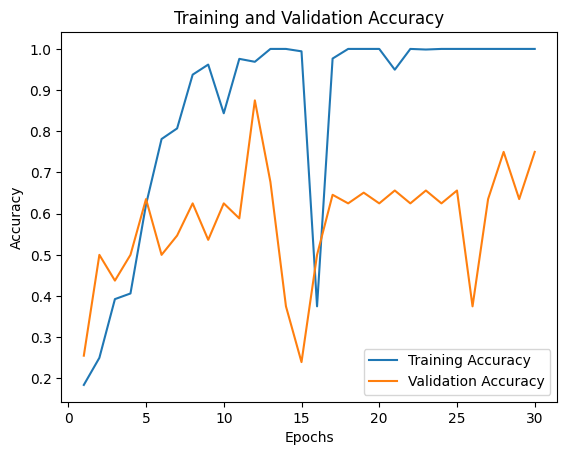

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.75


In [12]:
import matplotlib.pyplot as plt

train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(1, n_epochs+1), train_acc, label='Training Accuracy')
plt.plot(range(1, n_epochs+1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Final Training Accuracy:", train_acc[-1])
print("Final Validation Accuracy:", val_acc[-1])

In [27]:
model.save('vehicle_model.h5')

In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image
loaded_model = tf.keras.models.load_model('vehicle_model.h5')

def predict_vehicle_with_loaded_model(img_path):
    img = image.load_img(img_path, target_size=(600, 600))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = loaded_model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    class_label = list(train_generator.class_indices.keys())[class_idx]
    return class_label

In [30]:
img_path = 'dataset/val/fire engine/4d05406e038cc708cccb6fc4951e8d83.jpg'
print(f'The predicted vehicle is: {predict_vehicle_with_loaded_model(img_path)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
The predicted vehicle is: fire engine
